# 규제가 있는 선형회귀 - 릿지, 라쏘, 엘라스틱넷 회귀

#### 규제가 있는 모델 구축 - 당뇨병 데이터세트
#### 1. 데이터 전처리
#### 2. Ridge, Lasso, Elasticnet regression 구축: 회귀 계수 확인, 하이퍼 파라미터 탐색
#### 3. 교차 검증으로 최적의 하이퍼파라미터 탐색: LassoCV()

In [ ]:
# 관련 라이브러리 및 모듈 Import
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
import warnings
warnings.filterwarnings(action='ignore')

# 0. 데이터 수집, 탐색, 준비

In [ ]:
from sklearn.datasets import load_diabetes

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import LassoCV

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score



In [ ]:
diab = load_diabetes()

####  데이터셋에 대한 설명 및 정보 확인

In [ ]:
# 데이터셋 정보확인
#  #이미 스케일링 되어 있음을 확인할 것(Lm 모델에서)

In [ ]:
print(diab.DESCR)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - age     age in years
      - sex
      - bmi     body mass index
      - bp      average blood pressure
      - s1      tc, total serum cholesterol
      - s2      ldl, low-density lipoproteins
      - s3      hdl, high-density lipoproteins
      - s4      tch, total cholesterol / HDL
      - s5      ltg, possibly log of serum triglycerides level
      - s6      glu, blood sugar level

Note: Each of these 1

In [ ]:
diab.keys()

dict_keys(['data', 'target', 'frame', 'DESCR', 'feature_names', 'data_filename', 'target_filename', 'data_module'])

In [ ]:
diab.data

array([[ 0.03807591,  0.05068012,  0.06169621, ..., -0.00259226,
         0.01990842, -0.01764613],
       [-0.00188202, -0.04464164, -0.05147406, ..., -0.03949338,
        -0.06832974, -0.09220405],
       [ 0.08529891,  0.05068012,  0.04445121, ..., -0.00259226,
         0.00286377, -0.02593034],
       ...,
       [ 0.04170844,  0.05068012, -0.01590626, ..., -0.01107952,
        -0.04687948,  0.01549073],
       [-0.04547248, -0.04464164,  0.03906215, ...,  0.02655962,
         0.04452837, -0.02593034],
       [-0.04547248, -0.04464164, -0.0730303 , ..., -0.03949338,
        -0.00421986,  0.00306441]])

#### 데이터프레임 변환

In [ ]:
# 독립변수(피처)와 종속변수를 DataFrame자료형으로 변환

In [ ]:
# 데이터셋 객체의 data 배열, 즉, 독립변수 X가되는 피처(특성)들을 DataFrame자료형으로 변환하여
# diab_df생성
# diab_df.head() 데이터 5개 확인
diab_df = pd.DataFrame(data=diab.data, columns=diab.feature_names)
diab_df

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641
...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018118,0.044485
439,0.041708,0.050680,-0.015906,0.017282,-0.037344,-0.013840,-0.024993,-0.011080,-0.046879,0.015491
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044528,-0.025930


In [ ]:
diab_df.shape

(442, 10)

In [ ]:
# 누락치 확인,  data type 확인 ->  isnull().sum(), target에 결측값이 있으면 해당 관측치 제거

In [ ]:
diab_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442 entries, 0 to 441
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   age     442 non-null    float64
 1   sex     442 non-null    float64
 2   bmi     442 non-null    float64
 3   bp      442 non-null    float64
 4   s1      442 non-null    float64
 5   s2      442 non-null    float64
 6   s3      442 non-null    float64
 7   s4      442 non-null    float64
 8   s5      442 non-null    float64
 9   s6      442 non-null    float64
dtypes: float64(10)
memory usage: 34.7 KB


In [ ]:
pd.options.display.float_format='{:.5f}'.format
#pd.reset_options('display.float_format')

In [ ]:
diab_df.describe()


,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
count,442.00000,442.00000,442.00000,442.00000,442.00000,442.00000,442.00000,442.00000,442.00000,442.00000
mean,-0.00000,0.00000,-0.00000,0.00000,-0.00000,0.00000,-0.00000,0.00000,-0.00000,-0.00000
std,0.04762,0.04762,0.04762,0.04762,0.04762,0.04762,0.04762,0.04762,0.04762,0.04762
min,-0.10723,-0.04464,-0.09028,-0.11240,-0.12678,-0.11561,-0.10231,-0.07639,-0.12610,-0.13777
25%,-0.03730,-0.04464,-0.03423,-0.03666,-0.03425,-0.03036,-0.03512,-0.03949,-0.03325,-0.03318
50%,0.00538,-0.04464,-0.00728,-0.00567,-0.00432,-0.00382,-0.00658,-0.00259,-0.00195,-0.00108
75%,0.03808,0.05068,0.03125,0.03564,0.02836,0.02984,0.02931,0.03431,0.03243,0.02792
max,0.11073,0.05068,0.17056,0.13204,0.15391,0.19879,0.18118,0.18523,0.13360,0.13561


In [ ]:
#   타겟 데이터를 데이터프레임 열에 추가
diab_df['progress'] = diab.target
diab_df

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,progress
0,0.03808,0.05068,0.06170,0.02187,-0.04422,-0.03482,-0.04340,-0.00259,0.01991,-0.01765,151.00000
1,-0.00188,-0.04464,-0.05147,-0.02633,-0.00845,-0.01916,0.07441,-0.03949,-0.06833,-0.09220,75.00000
2,0.08530,0.05068,0.04445,-0.00567,-0.04560,-0.03419,-0.03236,-0.00259,0.00286,-0.02593,141.00000
3,-0.08906,-0.04464,-0.01160,-0.03666,0.01219,0.02499,-0.03604,0.03431,0.02269,-0.00936,206.00000
4,0.00538,-0.04464,-0.03638,0.02187,0.00393,0.01560,0.00814,-0.00259,-0.03199,-0.04664,135.00000
...,...,...,...,...,...,...,...,...,...,...,...
437,0.04171,0.05068,0.01966,0.05974,-0.00570,-0.00257,-0.02867,-0.00259,0.03119,0.00721,178.00000
438,-0.00551,0.05068,-0.01591,-0.06764,0.04934,0.07917,-0.02867,0.03431,-0.01812,0.04449,104.00000
439,0.04171,0.05068,-0.01591,0.01728,-0.03734,-0.01384,-0.02499,-0.01108,-0.04688,0.01549,132.00000
440,-0.04547,-0.04464,0.03906,0.00122,0.01632,0.01528,-0.02867,0.02656,0.04453,-0.02593,220.00000


<AxesSubplot:xlabel='progress', ylabel='Density'>

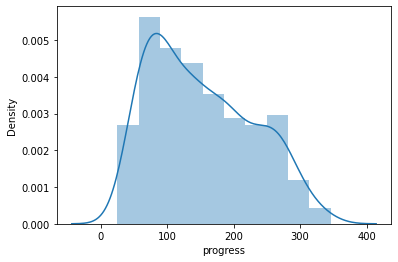

In [ ]:
#타겟의 분포 확인 :회귀 모델은 특성과 타겟이 정규분포일때 잘 예측함

import seaborn as sns

sns.distplot(diab_df['progress'])

In [ ]:
# X(독립변수), Y(종속변수) 분할
# 방법1
X = diab.data

# 방법2
X = diab_df.drop(['progress'], axis=1).to_numpy()

y = np.array(diab_df['progress'])


array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310., 101.,
        69., 179., 185., 118., 171., 166., 144.,  97., 168.,  68.,  49.,
        68., 245., 184., 202., 137.,  85., 131., 283., 129.,  59., 341.,
        87.,  65., 102., 265., 276., 252.,  90., 100.,  55.,  61.,  92.,
       259.,  53., 190., 142.,  75., 142., 155., 225.,  59., 104., 182.,
       128.,  52.,  37., 170., 170.,  61., 144.,  52., 128.,  71., 163.,
       150.,  97., 160., 178.,  48., 270., 202., 111.,  85.,  42., 170.,
       200., 252., 113., 143.,  51.,  52., 210.,  65., 141.,  55., 134.,
        42., 111.,  98., 164.,  48.,  96.,  90., 162., 150., 279.,  92.,
        83., 128., 102., 302., 198.,  95.,  53., 134., 144., 232.,  81.,
       104.,  59., 246., 297., 258., 229., 275., 281., 179., 200., 200.,
       173., 180.,  84., 121., 161.,  99., 109., 115., 268., 274., 158.,
       107.,  83., 103., 272.,  85., 280., 336., 281., 118., 317., 235.,
        60., 174., 259., 178., 128.,  96., 126., 28

In [ ]:
# 학습용, 평가용 데이터 분리

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 모델별 계수변화, 알파별 계수 비교 데이터프레임(comp_df)

In [ ]:
#각 모델별 계수로 이루어진 데이터프레임 준비
comp_df = pd.DataFrame(index=(diab.feature_names) + ["R2 score"])

comp_df

""
age
sex
bmi
bp
s1
s2
s3
s4
s5
s6


In [ ]:
#각 모델별, 규제강도별 평가지표 저장


# 1. 규제가 없는 선형모델

In [ ]:
# 당뇨병 데이터를 활용하여 규제가 없는 다중선형회귀를 수행하고 결정계수와 bmi 계수를 출력하라

In [ ]:
#모델 구축 및 학습 - LinearRegression
model_LR = LinearRegression()
model_LR.fit(X_train, y_train)
#모델 평가
y_pred = model_LR.predict(X_test)
r2 = r2_score(y_test, y_pred)

# 회귀 계수 확인
LR_coef = pd.Series(model_LR.coef_, index=diab.feature_names)
print(r2, LR_coef['bmi'])

0.47729201741573335 546.2973726341079


In [ ]:
coef

s5     659.27134
bmi    546.29737
s2     506.76115
bp     388.40077
s4     288.02932
s3     121.14846
s6      41.37537
age     29.25035
sex   -261.70768
s1    -901.95339
dtype: float64

- 계수값 시각화

<BarContainer object of 10 artists>

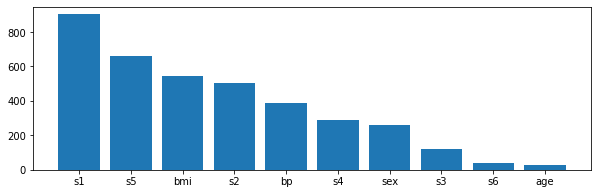

In [ ]:
coef = pd.Series(np.abs(model_LR.coef_), index=diab.feature_names).sort_values(ascending=False)
# 시각화
plt.figure(figsize=(10, 3))
plt.bar(coef.index, coef.values)

In [ ]:
# 모델별 비교 데이터프레임 열 추가
comp_df["LR"] = np.append(model_LR.coef_, r2)
comp_df

,LR
age,29.25035
sex,-261.70768
bmi,546.29737
bp,388.40077
s1,-901.95339
s2,506.76115
s3,121.14846
s4,288.02932
s5,659.27134
s6,41.37537


# 1. 릿지 모델

In [ ]:
from sklearn.linear_model import Ridge

model_Ridge = Ridge(alpha=1)
model_Ridge.fit(X_train, y_train)

Ridge(alpha=1)

In [ ]:
# 릿지 선형회귀 모델 평가: model_Ridge1, alpha=1
y_pred = model_Ridge.predict(X_test)
r2 = r2_score(y_test, y_pred)

# a=1일때 회귀 계수 확인
Ridge_coef = pd.Series(model_Ridge.coef_ , index=diab.feature_names)
Ridge_coef

age     45.05377
sex    -71.94755
bmi    280.71588
bp     195.21370
s1      -2.22943
s2     -17.54116
s3    -148.68899
s4     120.46709
s5     198.61486
s6     106.93453
dtype: float64

- 계수값 시각화

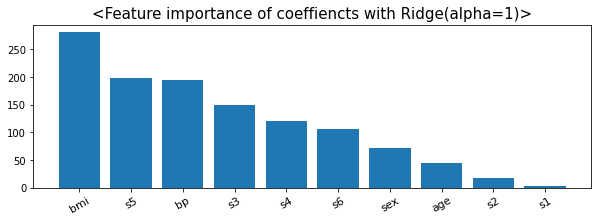

In [ ]:
# 시각화d
coef = pd.Series(np.abs(model_Ridge.coef_), index=diab.feature_names).sort_values(ascending=False)

# 시각화
plt.figure(figsize=(10, 3))
plt.title("<Feature importance of coeffiencts with Ridge(alpha=1)>", fontsize=15)
plt.bar(coef.index, coef.values, align='center' )
plt.xticks(coef.index, rotation=30, fontsize=11)
plt.show()

In [ ]:
# alpha_list=[0.01, 1, 10, 100]인 경우

alpha_list = [0.01, 1, 10, 100 ]

for alpha in alpha_list:
    model_Ridge = Ridge(alpha=alpha)
    model_Ridge.fit(X_train, y_train)
    
    y_pred = model_Ridge.predict(X_test)
    r2 = r2_score(y_test, y_pred)
    
    col_name = 'Ride(alpha={:.2f})'.format(alpha)
    comp_df[col_name] = np.append(model_Ridge.coef_, r2)


In [ ]:
comp_df

,LR,Ride(alpha=0.01),Ride(alpha=1.00),Ride(alpha=10.00),Ride(alpha=100.00)
age,29.25035,34.16460,45.05377,16.23087,2.07285
sex,-261.70768,-254.04432,-71.94755,-2.96137,-0.00381
bmi,546.29737,550.84240,280.71588,59.52415,6.89991
bp,388.40077,379.13025,195.21370,43.42150,5.08512
s1,-901.95339,-404.24680,-2.22943,13.87507,2.06966
s2,506.76115,123.02427,-17.54116,10.86525,1.74375
s3,121.14846,-99.04672,-148.68899,-37.49585,-4.50888
s4,288.02932,215.02921,120.46709,38.72853,4.90242
s5,659.27134,463.84322,198.61486,49.22477,5.92650
s6,41.37537,50.35055,106.93453,34.73798,4.32870


# 2. 라쏘 모델

In [ ]:
from sklearn.linear_model import Lasso

# alpha = 1
model_Lasso1 = Lasso(alpha=1)
model_Lasso1.fit(X_train, y_train)


Lasso(alpha=1)

In [ ]:
# 라쏘 선형회귀 모델 평가(alpha=1)
# 선형 모델 평가
y_pred = model_Lasso1.predict(X_test)
r2 = r2_score(y_test, y_pred)
print(r2)
                              
#a = 1 라쏘 모델 회귀 계수
Lasso_coef= pd.Series(model_Lasso1.coef_, index=diab.feature_names)
Lasso_coef



0.3618987156871778


age     0.00000
sex    -0.00000
bmi   443.70216
bp     51.60340
s1      0.00000
s2      0.00000
s3     -0.00000
s4      0.00000
s5    201.96713
s6      0.00000
dtype: float64

- 계수 시각화

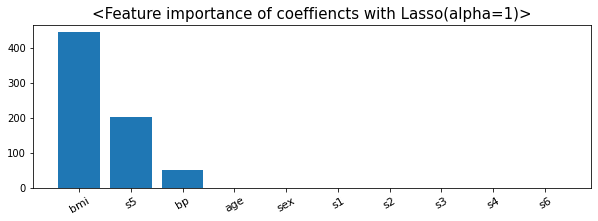

In [ ]:
# 시각화
coef = pd.Series(np.abs(model_Lasso1.coef_), index=diab.feature_names).sort_values(ascending=False)

# 시각화
plt.figure(figsize=(10, 3))
plt.title("<Feature importance of coeffiencts with Lasso(alpha=1)>", fontsize=15)
plt.bar(coef.index, coef.values, align='center' )
plt.xticks(coef.index, rotation=30, fontsize=11)
plt.show()

In [ ]:
# alpha_list=[0.01, 1, 10, 100]인 경우

alpha_list=[0.01, 1, 10, 100]
for alpha in alpha_list:
    model_Lasso = Lasso(alpha = alpha)
    model_Lasso.fit(X_train, y_train)
    
    y_pred = model_Lasso.predict(X_test)
    r2 = r2_score(y_test, y_pred)
    
    col_name = 'Lasso(alpha={:.2f})'.format(alpha)
    comp_df[col_name] = np.append(model_Lasso.coef_, r2)

comp_df

,LR,Ride(alpha=0.01),Ride(alpha=1.00),Ride(alpha=10.00),Ride(alpha=100.00),Lasso(alpha=0.01),Lasso(alpha=1.00),Lasso(alpha=10.00),Lasso(alpha=100.00)
age,29.25035,34.16460,45.05377,16.23087,2.07285,28.24351,0.00000,0.00000,0.00000
sex,-261.70768,-254.04432,-71.94755,-2.96137,-0.00381,-250.82019,-0.00000,0.00000,0.00000
bmi,546.29737,550.84240,280.71588,59.52415,6.89991,556.21350,443.70216,0.00000,0.00000
bp,388.40077,379.13025,195.21370,43.42150,5.08512,380.66291,51.60340,0.00000,0.00000
s1,-901.95339,-404.24680,-2.22943,13.87507,2.06966,-468.72483,0.00000,0.00000,0.00000
s2,506.76115,123.02427,-17.54116,10.86525,1.74375,166.98261,0.00000,0.00000,0.00000
s3,121.14846,-99.04672,-148.68899,-37.49585,-4.50888,-60.22857,-0.00000,-0.00000,-0.00000
s4,288.02932,215.02921,120.46709,38.72853,4.90242,230.91091,0.00000,0.00000,0.00000
s5,659.27134,463.84322,198.61486,49.22477,5.92650,492.63215,201.96713,0.00000,0.00000
s6,41.37537,50.35055,106.93453,34.73798,4.32870,43.96840,0.00000,0.00000,0.00000


# 3. 엘라스틱넷 모델

In [ ]:
from sklearn.linear_model import ElasticNet


# 모델 구축 및 학습(alpha=1, l1_ratio=0.5)
model_ElasticNet1 = ElasticNet(alpha=1, l1_ratio=0.5)
model_ElasticNet1.fit(X_train, y_train)


ElasticNet(alpha=1)

In [ ]:
#모델 평가 및 회귀 계수 확인
y_pred = model_ElasticNet1.predict(X_test)
r2 = r2_score(y_test, y_pred)
print('r2 ', r2)

#alpha = 1 엘라스틱넷 모델 회귀 계수
ElasticNet_coef = pd.Series(model_ElasticNet1.coef_, index=diab.feature_names)
ElasticNet_coef


r2  0.003107048190759798


age    0.36757
sex    0.00000
bmi    3.51205
bp     2.32866
s1     0.38019
s2     0.16834
s3    -1.95596
s4     2.22813
s5     2.88743
s6     1.84622
dtype: float64

- 계수 시각화

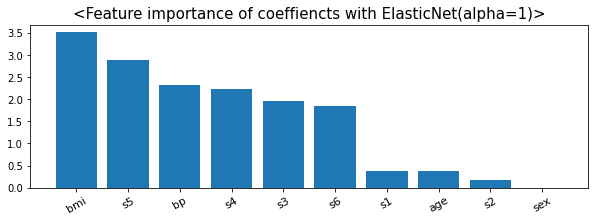

In [ ]:
# 시각화
coef = pd.Series(np.abs(model_ElasticNet1.coef_), index=diab.feature_names).sort_values(ascending=False)

# 시각화
plt.figure(figsize=(10, 3))
plt.title("<Feature importance of coeffiencts with ElasticNet(alpha=1)>", fontsize=15)
plt.bar(coef.index, coef.values, align='center' )
plt.xticks(coef.index, rotation=30, fontsize=11)
plt.show()

In [ ]:
# alpha_list=[0.01, 1, 10, 100]인 경우, l1_ratio=0.5 

alpha_list=[0.01, 1, 10, 100]
for alpha in alpha_list:
    model_ElasticNet = ElasticNet(alpha = alpha, l1_ratio=0.5)
    model_ElasticNet.fit(X_train, y_train)
    
    y_pred = model_ElasticNet.predict(X_test)
    r2 = r2_score(y_test, y_pred)
    
    col_name = 'ElasticNet(alpha={:.2f})'.format(alpha)
    comp_df[col_name] = np.append(model_ElasticNet.coef_, r2)

comp_df


,LR,Ride(alpha=0.01),Ride(alpha=1.00),Ride(alpha=10.00),Ride(alpha=100.00),Lasso(alpha=0.01),Lasso(alpha=1.00),Lasso(alpha=10.00),Lasso(alpha=100.00),ElasticNet(alpha=0.01),ElasticNet(alpha=1.00),ElasticNet(alpha=10.00),ElasticNet(alpha=100.00)
age,29.25035,34.16460,45.05377,16.23087,2.07285,28.24351,0.00000,0.00000,0.00000,41.41772,0.36757,0.00000,0.00000
sex,-261.70768,-254.04432,-71.94755,-2.96137,-0.00381,-250.82019,-0.00000,0.00000,0.00000,-45.93511,0.00000,0.00000,0.00000
bmi,546.29737,550.84240,280.71588,59.52415,6.89991,556.21350,443.70216,0.00000,0.00000,225.05324,3.51205,0.00000,0.00000
bp,388.40077,379.13025,195.21370,43.42150,5.08512,380.66291,51.60340,0.00000,0.00000,158.16399,2.32866,0.00000,0.00000
s1,-901.95339,-404.24680,-2.22943,13.87507,2.06966,-468.72483,0.00000,0.00000,0.00000,9.02097,0.38019,0.00000,0.00000
s2,506.76115,123.02427,-17.54116,10.86525,1.74375,166.98261,0.00000,0.00000,0.00000,-1.76225,0.16834,0.00000,0.00000
s3,121.14846,-99.04672,-148.68899,-37.49585,-4.50888,-60.22857,-0.00000,-0.00000,-0.00000,-124.24009,-1.95596,-0.00000,-0.00000
s4,288.02932,215.02921,120.46709,38.72853,4.90242,230.91091,0.00000,0.00000,0.00000,106.91002,2.22813,0.00000,0.00000
s5,659.27134,463.84322,198.61486,49.22477,5.92650,492.63215,201.96713,0.00000,0.00000,165.00639,2.88743,0.00000,0.00000
s6,41.37537,50.35055,106.93453,34.73798,4.32870,43.96840,0.00000,0.00000,0.00000,97.21337,1.84622,0.00000,0.00000


In [ ]:
comp_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11 entries, age to R2 score
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   LR                        11 non-null     float64
 1   Ride(alpha=0.01)          11 non-null     float64
 2   Ride(alpha=1.00)          11 non-null     float64
 3   Ride(alpha=10.00)         11 non-null     float64
 4   Ride(alpha=100.00)        11 non-null     float64
 5   Lasso(alpha=0.01)         11 non-null     float64
 6   Lasso(alpha=1.00)         11 non-null     float64
 7   Lasso(alpha=10.00)        11 non-null     float64
 8   Lasso(alpha=100.00)       11 non-null     float64
 9   ElasticNet(alpha=0.01)    11 non-null     float64
 10  ElasticNet(alpha=1.00)    11 non-null     float64
 11  ElasticNet(alpha=10.00)   11 non-null     float64
 12  ElasticNet(alpha=100.00)  11 non-null     float64
dtypes: float64(13)
memory usage: 1.2+ KB


### LassoCV() : k-폴드 교차 검증으로 최적의 Lasso 모델 하이퍼파라미터 alpha 찾기

In [ ]:
np.arange(0.01, 10, 0.01)

array([0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 , 0.11,
       0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21, 0.22,
       0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32, 0.33,
       0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43, 0.44,
       0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54, 0.55,
       0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65, 0.66,
       0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76, 0.77,
       0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87, 0.88,
       0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98, 0.99,
       1.  , 1.01, 1.02, 1.03, 1.04, 1.05, 1.06, 1.07, 1.08, 1.09, 1.1 ,
       1.11, 1.12, 1.13, 1.14, 1.15, 1.16, 1.17, 1.18, 1.19, 1.2 , 1.21,
       1.22, 1.23, 1.24, 1.25, 1.26, 1.27, 1.28, 1.29, 1.3 , 1.31, 1.32,
       1.33, 1.34, 1.35, 1.36, 1.37, 1.38, 1.39, 1.4 , 1.41, 1.42, 1.43,
       1.44, 1.45, 1.46, 1.47, 1.48, 1.49, 1.5 , 1.

In [ ]:
#alpha_list=[0.01, 1, 10, 100]
alpha_list = np.arange(0.01, 10, 0.01)
cv=5
max_iter = 5000

In [ ]:
from sklearn.linear_model import LassoCV

#LassoCV()에 필요한 매개변수 설정
model_LassoCV = LassoCV(alphas=alpha_list, cv=cv, max_iter = max_iter, n_jobs=-1, random_state=42)


- 모델 학습

In [ ]:
model_LassoCV.fit(X_train, y_train)

LassoCV(alphas=array([0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 , 0.11,
       0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21, 0.22,
       0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32, 0.33,
       0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43, 0.44,
       0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54, 0.55,
       0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65, 0.66,
       0.67...
       9.36, 9.37, 9.38, 9.39, 9.4 , 9.41, 9.42, 9.43, 9.44, 9.45, 9.46,
       9.47, 9.48, 9.49, 9.5 , 9.51, 9.52, 9.53, 9.54, 9.55, 9.56, 9.57,
       9.58, 9.59, 9.6 , 9.61, 9.62, 9.63, 9.64, 9.65, 9.66, 9.67, 9.68,
       9.69, 9.7 , 9.71, 9.72, 9.73, 9.74, 9.75, 9.76, 9.77, 9.78, 9.79,
       9.8 , 9.81, 9.82, 9.83, 9.84, 9.85, 9.86, 9.87, 9.88, 9.89, 9.9 ,
       9.91, 9.92, 9.93, 9.94, 9.95, 9.96, 9.97, 9.98, 9.99]),
        cv=5, max_iter=5000, n_jobs=-1, random_state=42)

In [ ]:
model_LassoCV.alpha_

0.01

In [ ]:
y_pred= model_LassoCV.predict(X_test)

In [ ]:
r2_score(y_test, y_pred)

0.4787160211806072

# [응용] 보스턴 주택가격 데이터를 활용하여, 규제가 없을때, 리지, 라쏘, 엘라스틱넷 선형회귀를 수행하고 각각의 회귀계수 및  예측 성능을 비교하라
- 테스트 사이즈:0.3
- random_state=42

In [ ]:
from sklearn.datasets import load_boston

boston = load_boston()

X = boston.data
y = boston.target

In [ ]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import LassoCV

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score



In [ ]:
# train, test 분할
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
# 다중회귀, 리지회귀, 라쏘 회귀, 엘라스틱넷 회귀 수행

In [ ]:
from sklearn.linear_model import LinearRegression

def get_r2_coef(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    r2 = r2_score(y_test, y_pred)
    print('model; ', model)
    print('r2: ', r2)
    print()
    
    coef = pd.Series(model.coef_, index=boston.feature_names)
    print(coef)
    print('-'*50)
    return


In [ ]:
# 다중회귀

LR = LinearRegression()
get_r2_coef(LR, X_train, y_train, X_test, y_test)

model;  LinearRegression()
r2:  0.7112260057484912

CRIM       -0.13347
ZN          0.03581
INDUS       0.04952
CHAS        3.11984
NOX       -15.41706
RM          4.05720
AGE        -0.01082
DIS        -1.38600
RAD         0.24273
TAX        -0.00870
PTRATIO    -0.91069
B           0.01179
LSTAT      -0.54711
dtype: float64
--------------------------------------------------


In [ ]:
# 리지 회귀

alpha_list=[0.01, 1, 10, 100]

for alpha in alpha_list:
    model_Ridge = Ridge(alpha=alpha)
    get_r2_coef(model_Ridge, X_train, y_train, X_test, y_test)

model;  Ridge(alpha=0.01)
r2:  0.7111351633163308

CRIM       -0.13337
ZN          0.03583
INDUS       0.04891
CHAS        3.11732
NOX       -15.27000
RM          4.05768
AGE        -0.01095
DIS        -1.38377
RAD         0.24237
TAX        -0.00871
PTRATIO    -0.90904
B           0.01180
LSTAT      -0.54740
dtype: float64
--------------------------------------------------
model;  Ridge(alpha=1)
r2:  0.7041586727559435

CRIM      -0.12843
ZN         0.03695
INDUS      0.01791
CHAS       2.93269
NOX       -7.84806
RM         4.06357
AGE       -0.01724
DIS       -1.27176
RAD        0.22549
TAX       -0.00938
PTRATIO   -0.82710
B          0.01199
LSTAT     -0.56347
dtype: float64
--------------------------------------------------
model;  Ridge(alpha=10)
r2:  0.6954181695183626

CRIM      -0.12655
ZN         0.03950
INDUS     -0.00876
CHAS       2.10758
NOX       -1.43399
RM         3.78285
AGE       -0.01985
DIS       -1.17825
RAD        0.22528
TAX       -0.01046
PTRATIO   -0.77353
B   

In [ ]:
# 라쏘 회귀
alpha_list=[0.01, 1, 10, 100]

for alpha in alpha_list:
    model_Lasso = Lasso(alpha=alpha)
    get_r2_coef(model_Lasso, X_train, y_train, X_test, y_test)

model;  Lasso(alpha=0.01)
r2:  0.7088264519692222

CRIM       -0.13100
ZN          0.03626
INDUS       0.03471
CHAS        2.94331
NOX       -11.90127
RM          4.05058
AGE        -0.01345
DIS        -1.32916
RAD         0.23458
TAX        -0.00900
PTRATIO    -0.87148
B           0.01190
LSTAT      -0.55591
dtype: float64
--------------------------------------------------
model;  Lasso(alpha=1)
r2:  0.655906082915434

CRIM      -0.09192
ZN         0.03467
INDUS     -0.00000
CHAS       0.00000
NOX       -0.00000
RM         1.28132
AGE        0.01144
DIS       -0.61602
RAD        0.19150
TAX       -0.00954
PTRATIO   -0.70335
B          0.01083
LSTAT     -0.77992
dtype: float64
--------------------------------------------------
model;  Lasso(alpha=10)
r2:  0.5030666675993392

CRIM      -0.00000
ZN         0.01406
INDUS     -0.00000
CHAS       0.00000
NOX        0.00000
RM         0.00000
AGE        0.00000
DIS       -0.00000
RAD        0.00000
TAX       -0.00834
PTRATIO   -0.00000
B    

In [ ]:
# 엘라스틱넷 회귀
alpha_list=[0.01, 1, 10, 100]
l1_ratio= [ 0.1, 0.3, 0.6, 0.9]
for alpha in alpha_list:
    for l1 in l1_ratio:
        model_ElasticNet = ElasticNet(alpha=alpha, l1_ratio=l1)
        get_r2_coef(model_ElasticNet, X_train, y_train, X_test, y_test)

model;  ElasticNet(alpha=0.01, l1_ratio=0.1)
r2:  0.698508820346385

CRIM      -0.12626
ZN         0.03795
INDUS      0.00077
CHAS       2.64746
NOX       -3.69049
RM         4.00395
AGE       -0.02010
DIS       -1.20996
RAD        0.21950
TAX       -0.00988
PTRATIO   -0.78528
B          0.01211
LSTAT     -0.57795
dtype: float64
--------------------------------------------------
model;  ElasticNet(alpha=0.01, l1_ratio=0.3)
r2:  0.6992945156236627

CRIM      -0.12640
ZN         0.03773
INDUS      0.00293
CHAS       2.69748
NOX       -4.22976
RM         4.02145
AGE       -0.01977
DIS       -1.21695
RAD        0.21960
TAX       -0.00979
PTRATIO   -0.78985
B          0.01209
LSTAT     -0.57531
dtype: float64
--------------------------------------------------
model;  ElasticNet(alpha=0.01, l1_ratio=0.6)
r2:  0.701311989607996

CRIM      -0.12702
ZN         0.03733
INDUS      0.00859
CHAS       2.78247
NOX       -5.62182
RM         4.04472
AGE       -0.01876
DIS       -1.23622
RAD        0.2

In [ ]:
# GridSearchCV

from sklearn.model_selection import GridSearchCV

params = {
    'alpha':[0.01, 1, 10, 100],
    'l1_ratio':[ 0.1, 0.3, 0.6, 0.9]
}

model_ElasticNet = ElasticNet()
grid_reg = GridSearchCV(model_ElasticNet, param_grid=params, cv=3)

grid_reg.fit(X_train, y_train)
y_pred = grid_reg.predict(X_test)
r2_score(y_test ,y_pred)

grid_reg.best_params_

grid_reg.best_score_

grid_reg.cv_results_

{'mean_fit_time': array([0.0024329 , 0.00083637, 0.00048955, 0.00046603, 0.00048852,
        0.00038139, 0.0004317 , 0.000386  , 0.00030009, 0.00033331,
        0.00028022, 0.00026186, 0.00025066, 0.0002567 , 0.00024136,
        0.00023858]),
 'std_fit_time': array([9.32050373e-04, 3.84889464e-04, 2.00520593e-05, 5.74297961e-06,
        9.69618395e-05, 2.91289443e-05, 2.95653992e-05, 2.68980117e-05,
        4.18573827e-06, 3.89243431e-05, 1.09401543e-05, 2.62861815e-06,
        4.05233662e-07, 8.99132768e-07, 2.51063808e-06, 1.94992131e-06]),
 'mean_score_time': array([0.00057673, 0.00018477, 0.00012867, 0.00012334, 0.00014814,
        0.00013566, 0.00015601, 0.00013328, 0.0001293 , 0.00017111,
        0.00013526, 0.00012628, 0.00012461, 0.00012604, 0.00012302,
        0.00012406]),
 'std_score_time': array([1.25645611e-04, 6.04073201e-05, 2.92865845e-06, 1.26658896e-06,
        1.97012562e-05, 8.42487284e-06, 2.38834125e-05, 2.54561383e-06,
        4.48300196e-06, 4.58530164e-05, 3.33